## Linear Regression

Linear Regression Coefficients: [2.00000000e+02 1.91229925e-15]
Intercept: 1.4210854715202004e-14
MSE: 0.000000, R²: 1.000000


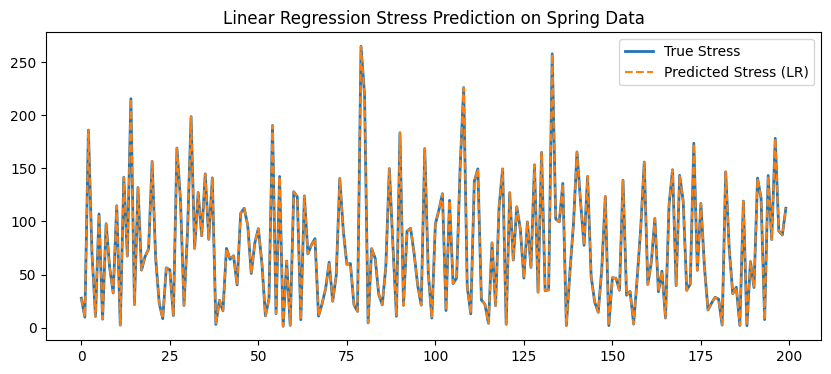

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# ---------------------------
# Load data
# ---------------------------
df = pd.read_csv("spring_data.csv")

# Input features (strain, strain_rate) and target (stress)
X = df[["strain", "strain_rate"]].values
y = df["stress"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# ---------------------------
# Train linear regression
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"MSE: {mse:.6f}, R²: {r2:.6f}")

# ---------------------------
# Plot results
# ---------------------------
plt.figure(figsize=(10,4))
plt.plot(y_test, label="True Stress", linewidth=2)
plt.plot(y_pred, label="Predicted Stress (LR)", linestyle="--")
plt.legend()
plt.title("Linear Regression Stress Prediction on Spring Data")
plt.show()


## RNN

Epoch [20/100], Loss: 0.012420
Epoch [40/100], Loss: 0.007232
Epoch [60/100], Loss: 0.006465
Epoch [80/100], Loss: 0.005405
Epoch [100/100], Loss: 0.004422


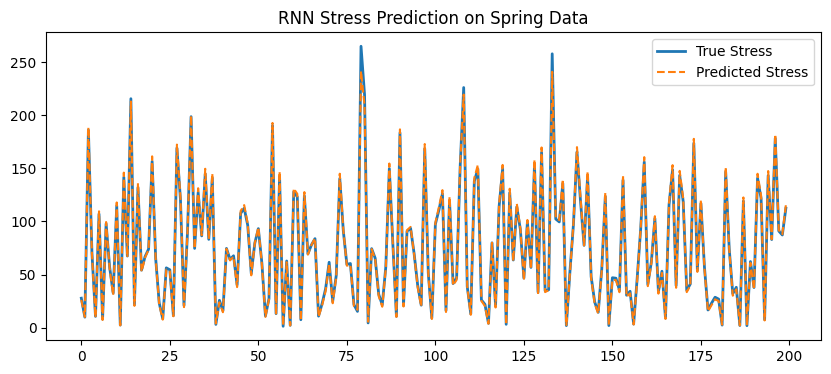

In [2]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Load data
# ---------------------------
df = pd.read_csv("spring_data.csv")

# Use strain and strain_rate as input features
X = df[["strain", "strain_rate"]].values.astype(np.float32)
y = df["stress"].values.astype(np.float32).reshape(-1, 1)

# Normalize (helps training stability)
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
y_mean, y_std = y.mean(), y.std()

X = (X - X_mean) / X_std
y = (y - y_mean) / y_std

# Convert to Torch tensors
X_tensor = torch.tensor(X).unsqueeze(1)   # [N, seq_len=1, features=2]
y_tensor = torch.tensor(y)                # [N, 1]

# Train/test split
train_size = int(0.8 * len(X))
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

# ---------------------------
# Define RNN model
# ---------------------------
class StressRNN(nn.Module):
    def __init__(self, input_size=2, hidden_size=16, num_layers=1):
        super(StressRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.rnn(x)      # out: [batch, seq_len, hidden_size]
        out = out[:, -1, :]       # take last time step
        out = self.fc(out)
        return out

model = StressRNN()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# ---------------------------
# Training loop
# ---------------------------
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

# ---------------------------
# Evaluation
# ---------------------------
model.eval()
with torch.no_grad():
    y_pred = model(X_test).numpy()
    y_true = y_test.numpy()

# Denormalize predictions
y_pred = y_pred * y_std + y_mean
y_true = y_true * y_std + y_mean

# ---------------------------
# Plot predictions vs true
# ---------------------------
plt.figure(figsize=(10,4))
plt.plot(y_true, label="True Stress", linewidth=2)
plt.plot(y_pred, label="Predicted Stress", linestyle="--")
plt.legend()
plt.title("RNN Stress Prediction on Spring Data")
plt.show()


## GRU

Epoch [20/100], Loss: 0.267181
Epoch [40/100], Loss: 0.040478
Epoch [60/100], Loss: 0.012593
Epoch [80/100], Loss: 0.008101
Epoch [100/100], Loss: 0.006294


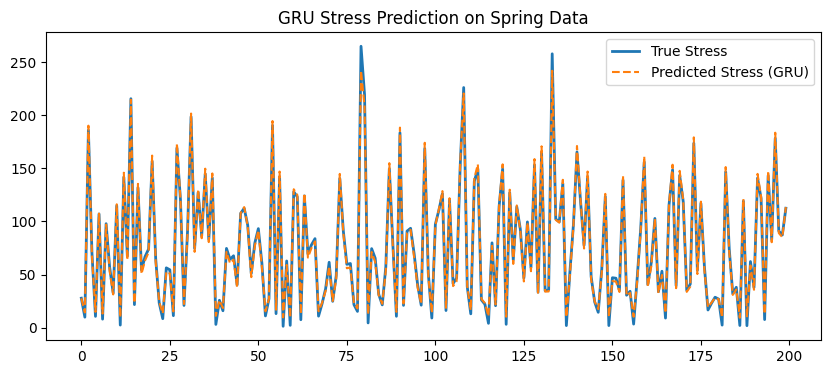

In [4]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Load data
# ---------------------------
df = pd.read_csv("spring_data.csv")

# Features: strain, strain_rate
X = df[["strain", "strain_rate"]].values.astype(np.float32)
y = df["stress"].values.astype(np.float32).reshape(-1, 1)

# Normalize
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
y_mean, y_std = y.mean(), y.std()

X = (X - X_mean) / X_std
y = (y - y_mean) / y_std

# Convert to Torch tensors
X_tensor = torch.tensor(X).unsqueeze(1)   # [N, seq_len=1, features=2]
y_tensor = torch.tensor(y)                # [N, 1]

# Train/test split
train_size = int(0.8 * len(X))
X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

# ---------------------------
# Define GRU model
# ---------------------------
class StressGRU(nn.Module):
    def __init__(self, input_size=2, hidden_size=16, num_layers=1):
        super(StressGRU, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.gru(x)      # out: [batch, seq_len, hidden_size]
        out = out[:, -1, :]       # take last time step
        out = self.fc(out)
        return out

model = StressGRU()

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# ---------------------------
# Training loop
# ---------------------------
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

# ---------------------------
# Evaluation
# ---------------------------
model.eval()
with torch.no_grad():
    y_pred = model(X_test).numpy()
    y_true = y_test.numpy()

# Denormalize predictions
y_pred = y_pred * y_std + y_mean
y_true = y_true * y_std + y_mean

# ---------------------------
# Plot predictions vs true
# ---------------------------
plt.figure(figsize=(10,4))
plt.plot(y_true, label="True Stress", linewidth=2)
plt.plot(y_pred, label="Predicted Stress (GRU)", linestyle="--")
plt.legend()
plt.title("GRU Stress Prediction on Spring Data")
plt.show()
